In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams[ 'figure.figsize' ]=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

df=pd.read_csv("NSE-TATA.csv")
df.Open


0       208.00
1       217.00
2       223.50
3       230.00
4       234.55
         ...  
1230    160.85
1231    161.15
1232    156.00
1233    155.70
1234    157.00
Name: Open, Length: 1235, dtype: float64

In [2]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

In [3]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [4]:

open_data=df.sort_index(ascending=True,axis=0)
new_open_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date',"Open"])

for i in range(0,len(open_data)):
    new_open_dataset["Date"][i]=open_data['Date'][i]
    new_open_dataset["Open"][i]=open_data["Open"][i]
    

new_open_dataset.index=new_open_dataset.Date
new_open_dataset.drop("Date",axis=1,inplace=True)

final_open_dataset=new_open_dataset.values

train_open_data=final_open_dataset[0:987,:]
valid_open_data=final_open_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_open_data=scaler.fit_transform(final_open_dataset)

x_train_open_data,y_train_open_data=[],[]

for i in range(60,len(train_open_data)):
    x_train_open_data.append(scaled_open_data[i-60:i,0])
    y_train_open_data.append(scaled_open_data[i,0])
    
x_train_open_data,y_train_open_data=np.array(x_train_open_data),np.array(y_train_open_data)

x_train_open_data=np.reshape(x_train_open_data,(x_train_open_data.shape[0],x_train_open_data.shape[1],1))




close_data=df.sort_index(ascending=True,axis=0)
new_close_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date',"Close"])

for i in range(0,len(close_data)):
    new_close_dataset["Date"][i]=close_data['Date'][i]
    new_close_dataset["Close"][i]=close_data["Close"][i]
    

new_close_dataset.index=new_close_dataset.Date
new_close_dataset.drop("Date",axis=1,inplace=True)

final_close_dataset=new_close_dataset.values

train_close_data=final_close_dataset[0:987,:]
valid_close_data=final_close_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_close_data=scaler.fit_transform(final_close_dataset)

x_train_close_data,y_train_close_data=[],[]

for i in range(60,len(train_close_data)):
    x_train_close_data.append(scaled_close_data[i-60:i,0])
    y_train_close_data.append(scaled_close_data[i,0])
    
x_train_close_data,y_train_close_data=np.array(x_train_close_data),np.array(y_train_close_data)

x_train_close_data=np.reshape(x_train_close_data,(x_train_close_data.shape[0],x_train_close_data.shape[1],1))




high_data=df.sort_index(ascending=True,axis=0)
new_high_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date',"High"])

for i in range(0,len(high_data)):
    new_high_dataset["Date"][i]=high_data['Date'][i]
    new_high_dataset["High"][i]=high_data["High"][i]
    

new_high_dataset.index=new_high_dataset.Date
new_high_dataset.drop("Date",axis=1,inplace=True)

final_high_dataset=new_high_dataset.values

train_high_data=final_high_dataset[0:987,:]
valid_high_data=final_high_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_high_data=scaler.fit_transform(final_high_dataset)

x_train_high_data,y_train_high_data=[],[]

for i in range(60,len(train_high_data)):
    x_train_high_data.append(scaled_high_data[i-60:i,0])
    y_train_high_data.append(scaled_high_data[i,0])
    
x_train_high_data,y_train_high_data=np.array(x_train_high_data),np.array(y_train_high_data)

x_train_high_data=np.reshape(x_train_high_data,(x_train_high_data.shape[0],x_train_high_data.shape[1],1))



high_data=df.sort_index(ascending=True,axis=0)
new_low_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date',"Low"])

for i in range(0,len(high_data)):
    new_low_dataset["Date"][i]=high_data['Date'][i]
    new_low_dataset["Low"][i]=high_data["Low"][i]
    

new_low_dataset.index=new_low_dataset.Date
new_low_dataset.drop("Date",axis=1,inplace=True)

final_high_dataset=new_low_dataset.values

train_low_data=final_high_dataset[0:987,:]
valid_low_data=final_high_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_low_data=scaler.fit_transform(final_high_dataset)

x_train_low_data,y_train_low_data=[],[]

for i in range(60,len(train_low_data)):
    x_train_low_data.append(scaled_low_data[i-60:i,0])
    y_train_low_data.append(scaled_low_data[i,0])
    
x_train_low_data,y_train_low_data=np.array(x_train_low_data),np.array(y_train_low_data)

x_train_low_data=np.reshape(x_train_low_data,(x_train_low_data.shape[0],x_train_low_data.shape[1],1))


In [5]:

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_open_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))




lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_open_data,y_train_open_data,epochs=1,batch_size=1,verbose=2)

inputs_open_data=new_open_dataset[len(new_open_dataset)-len(valid_open_data)-60:].values
inputs_open_data=inputs_open_data.reshape(-1,1)
inputs_open_data=scaler.transform(inputs_open_data)



lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_close_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))




lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_close_data,y_train_close_data,epochs=1,batch_size=1,verbose=2)

inputs_close_data=new_low_dataset[len(new_low_dataset)-len(valid_low_data)-60:].values
inputs_close_data=inputs_close_data.reshape(-1,1)
inputs_close_data=scaler.transform(inputs_close_data)




lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_high_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))




lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_high_data,y_train_high_data,epochs=1,batch_size=1,verbose=2)

inputs_high_data=new_high_dataset[len(new_high_dataset)-len(valid_high_data)-60:].values
inputs_high_data=inputs_high_data.reshape(-1,1)
inputs_high_data=scaler.transform(inputs_high_data)





lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_low_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))




lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_low_data,y_train_low_data,epochs=1,batch_size=1,verbose=2)

inputs_low_data=new_low_dataset[len(new_low_dataset)-len(valid_low_data)-60:].values
inputs_low_data=inputs_low_data.reshape(-1,1)
inputs_low_data=scaler.transform(inputs_low_data)



927/927 - 13s - loss: 0.0012
927/927 - 14s - loss: 0.0012
927/927 - 14s - loss: 0.0012
927/927 - 14s - loss: 0.0011


In [6]:

X_open_test=[]
for i in range(60,inputs_open_data.shape[0]):
    X_open_test.append(inputs_open_data[i-60:i,0])
X_open_test=np.array(X_open_test)

X_open_test=np.reshape(X_open_test,(X_open_test.shape[0],X_open_test.shape[1],1))
prediction_opening=lstm_model.predict(X_open_test)
prediction_opening=scaler.inverse_transform(prediction_opening)



X_close_test=[]
for i in range(60,inputs_close_data.shape[0]):
    X_close_test.append(inputs_close_data[i-60:i,0])
X_close_test=np.array(X_close_test)

X_close_test=np.reshape(X_close_test,(X_close_test.shape[0],X_close_test.shape[1],1))
prediction_closing=lstm_model.predict(X_close_test)
prediction_closing=scaler.inverse_transform(prediction_closing)



X_high_test=[]
for i in range(60,inputs_high_data.shape[0]):
    X_high_test.append(inputs_high_data[i-60:i,0])
X_high_test=np.array(X_high_test)

X_high_test=np.reshape(X_high_test,(X_high_test.shape[0],X_high_test.shape[1],1))
prediction_high=lstm_model.predict(X_high_test)
prediction_high=scaler.inverse_transform(prediction_high)



X_low_test=[]
for i in range(60,inputs_low_data.shape[0]):
    X_low_test.append(inputs_low_data[i-60:i,0])
X_low_test=np.array(X_low_test)

X_low_test=np.reshape(X_low_test,(X_low_test.shape[0],X_low_test.shape[1],1))
prediction_low=lstm_model.predict(X_low_test)
prediction_low=scaler.inverse_transform(prediction_low)


<ipython-input-7-f3e0a238ec02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_open_data['Predictions']=prediction_opening


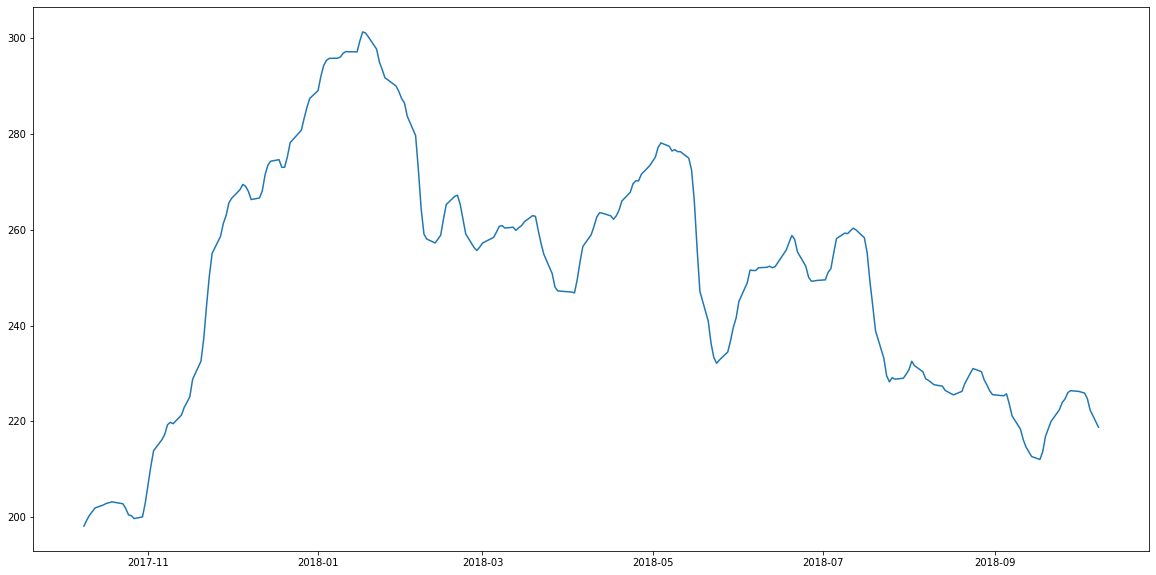

In [7]:
train_open_data=new_open_dataset[:987]
valid_open_data=new_open_dataset[987:]
valid_open_data['Predictions']=prediction_opening
# plt.plot(train_open_data["Open"])
plt.plot(valid_open_data[["Predictions"]])


<ipython-input-8-b268fe2aaee2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_close_data['Predictions']=prediction_closing


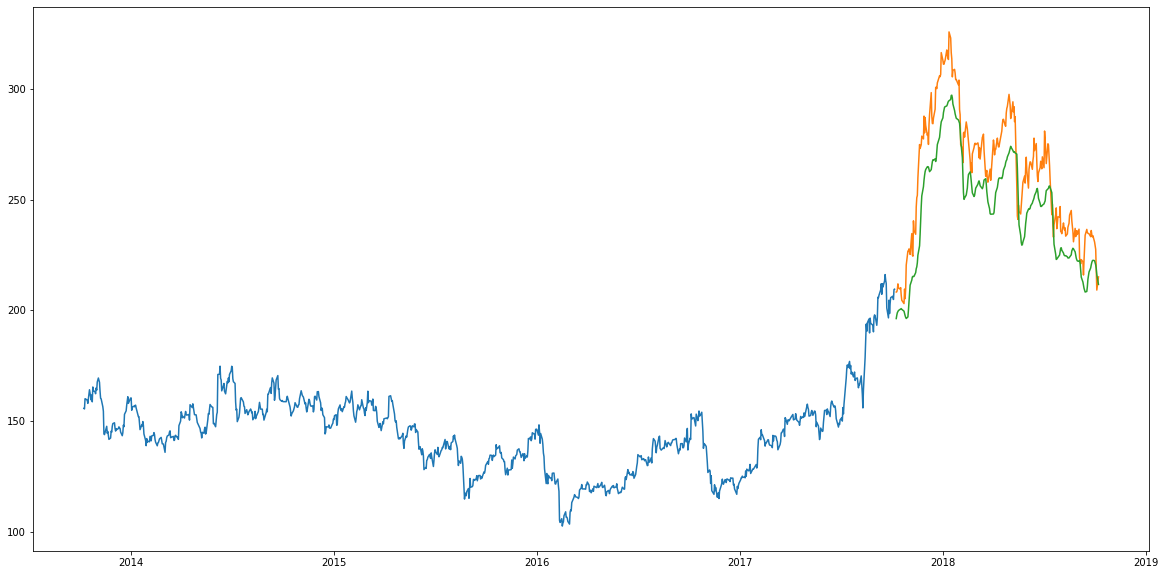

In [8]:

train_close_data=new_close_dataset[:987]
valid_close_data=new_close_dataset[987:]
valid_close_data['Predictions']=prediction_closing
plt.plot(train_close_data["Close"])
plt.plot(valid_close_data[["Close","Predictions"]])

In [19]:

train_high_data=new_high_dataset[:987]
valid_high_data=new_high_dataset[987:]
valid_high_data['Predictions']=prediction_high
# plt.plot(train_high_data["High"])
# plt.plot(valid_high_data[["High","Predictions"]])
prediction_high[0]


<ipython-input-19-48286bd67bad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_high_data['Predictions']=prediction_high


array([201.34679], dtype=float32)

<ipython-input-10-cd7ee5f1b069>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_low_data['Predictions']=prediction_low


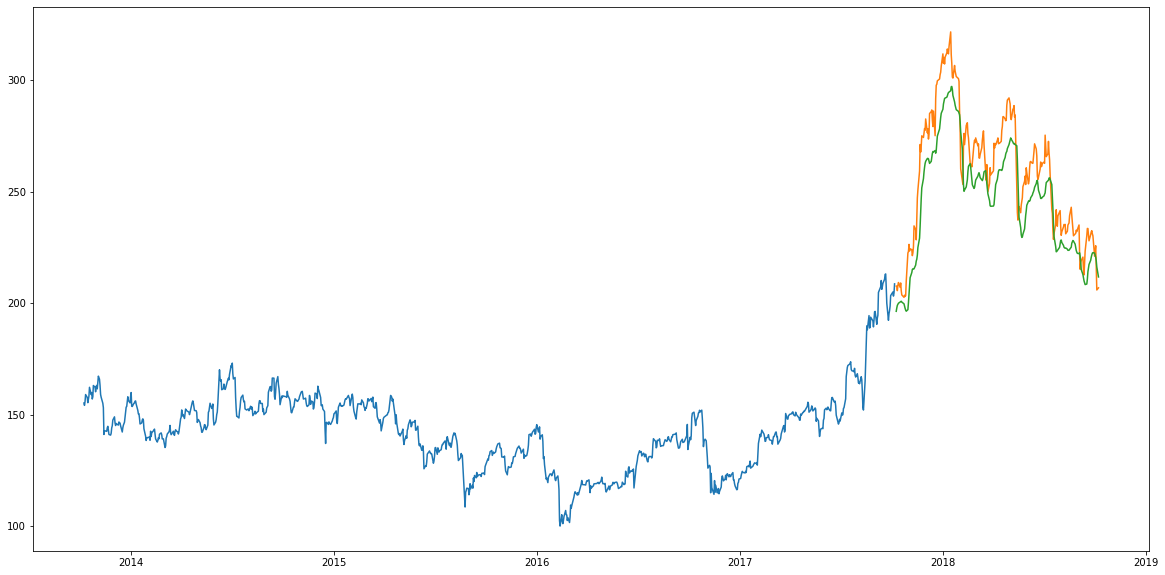

In [10]:

train_low_data=new_low_dataset[:987]
valid_low_data=new_low_dataset[987:]
valid_low_data['Predictions']=prediction_low
plt.plot(train_low_data["Low"])
plt.plot(valid_low_data[["Low","Predictions"]])

IndexError: index -1 is out of bounds for axis 0 with size 0

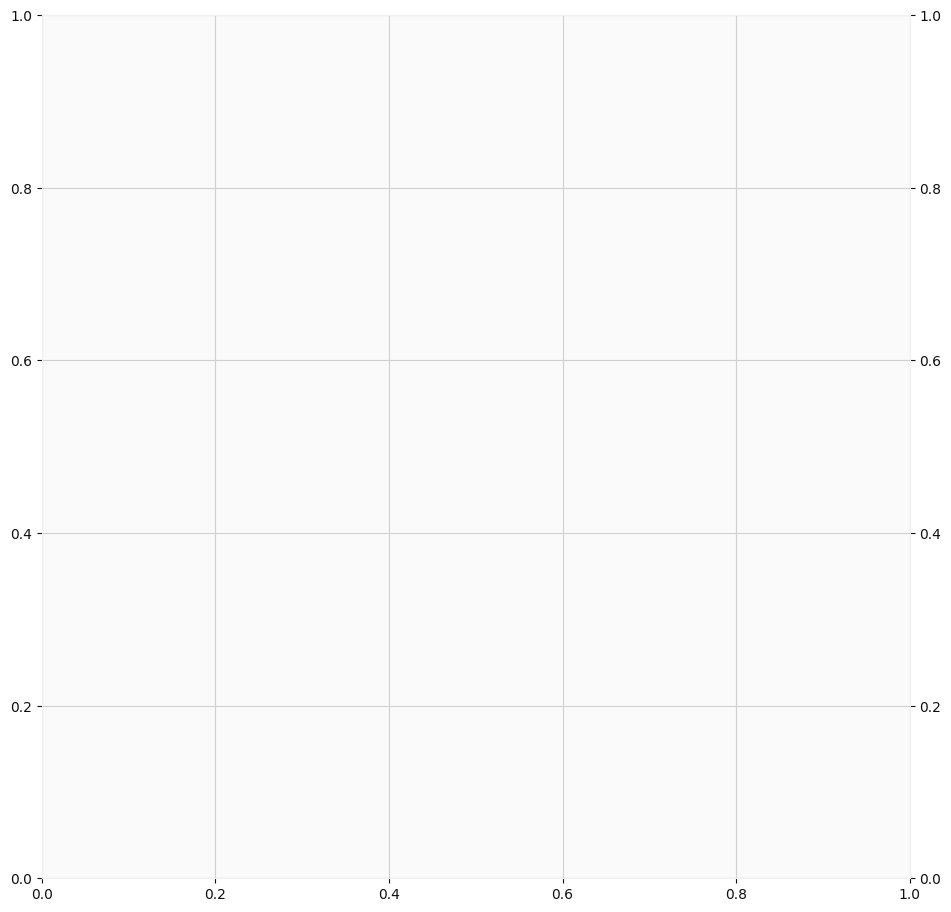

In [52]:
import pandas as pd
import mplfinance as mpl

data = pd.read_csv('AMZN.csv')
# data = pd.read_csv('NSE-TATA.csv')

data.Date = pd.to_datetime(data.Date)

data.Date
data = data.set_index('Date')
# data['2018-05-31':'2018-03-06']
# mpl.plot(data['2018-05':'2018-03'], type='candle', style='yahoo',
#         tight_layout=True,
#         figsize=(10,10))

# data['2020-05':'2020-07']
mpl.plot(data['2020-05':'2020-07'], type='candle', style='yahoo',
        tight_layout=True,
        figsize=(10,10))